In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
# 指定当前的工作目录
import os

# 此处为google drive中的文件路径,drive为之前指定的工作根目录，要加上
os.chdir("/content/drive/My Drive/Persona-Profile") 

In [4]:
!pip install seaborn

# 用户画像

In [0]:
#引入必要的包
import pandas as pd
import jieba
import jieba.posseg
import numpy as np
import seaborn as sns


In [6]:
#读取文件
train_data_path = '/content/drive/My Drive/Persona-Profile/data/train.csv'
train_file_name = 'train.csv'
test_file_name = 'test.csv'
train = pd.read_csv(train_data_path,sep='###__###',header=None)
train.columns =['id','age','gender','edu','query']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [7]:
#查看一下数据
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
train.head()
train.describe()
train.shape

,id,age,gender,edu,query
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只..."
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...


,age,gender,edu
count,100000.000000,100000.000000,100000.000000
mean,2.082310,1.387140,3.903330
std,1.184276,0.529495,1.522205
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000
50%,2.000000,1.000000,4.000000
75%,3.000000,2.000000,5.000000
max,6.000000,2.000000,6.000000


(100000, 5)

## 查看样本分布情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
id        100000 non-null object
age       100000 non-null int64
gender    100000 non-null int64
edu       100000 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


1    38996
2    26744
3    18529
4    10654
5     2922
0     1666
6      489
Name: age, dtype: int64

1    56976
2    40869
0     2155
Name: gender, dtype: int64

5    37107
4    28148
3    18858
0     9280
6     5693
2      560
1      354
Name: edu, dtype: int64

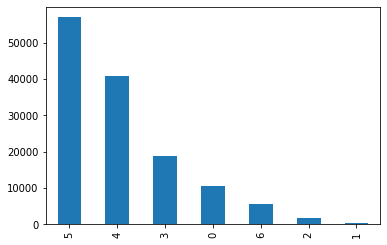

In [8]:
part_data = train[['id','age','gender','edu']]
part_data.info()
part_data['age'].value_counts()
part_data['gender'].value_counts()
part_data['edu'].value_counts()
%matplotlib inline
part_data['age'].value_counts().plot(kind='bar')
part_data['gender'].value_counts().plot(kind='bar')
part_data['edu'].value_counts().plot(kind='bar')

In [9]:
#取一部分数据
#train = train[:100]
train.shape

(100000, 5)

In [0]:
#分词
def pre_prosess(text):
    l = []
    #pos = ['n', 'nz', 'v', 'vd', 'vn', 'l', 'a', 'd']  # 定义选取的词性
    pos = ['n', 'v', 'j'] 
    seg = jieba.posseg.cut(text)  # 分词
    for i in seg:
        if i.word and i.flag in pos:  # 词性筛选
            l.append(i.word)
    return l

In [0]:
#进行分词并保存在df的segment列中，后续直接读取不用再进行分词，分词时间较长需要一个半小时左右
import datetime

start = datetime.datetime.now()
segments = []
query_list = train['query'].values.tolist()
train['segment']=None
i=0
jieba.enable_parallel()
for line in query_list:
    segment = []
    try :
        segment = pre_prosess(line)
        #segments.append(segment)
        train.loc[i,'segment'] = " ".join(segment)
        #print(" ".join(segment))
    except Exception as e:
        print(e)    
        print(line)
        continue
    finally:
        i+=1
end = datetime.datetime.now()
print(end - start)
save_df = train[['id','age','gender','edu','segment']]
save_df.to_csv('seg.csv', sep=',', header=True, index=True)

1:35:07.353477


In [0]:
train.head()
train.shape
type(train['segment'].values.tolist())

,id,age,gender,edu,query,segment
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...,双沟 女生 财经 查询 总裁 大人 行行好 财经 传媒 教师节 全文 男子 砸毁 墓碑 填 ...
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只...",厨宝 烤箱 世情 人情 雨 送 花易落 风干 泪痕 酒店用品 批发市场 不想 让 支付 无情...
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...,钻石 泪 耳机 到 公交 车牌 到 网游 网游 辽 到 到 炮神 燕窝 霉菌性 外敷 手 项...
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...,受欢迎 狗狗 排行榜 读 场景 描 写 范例 绘图 软件 枣 酸奶 能 吃 租 衣服 网站 ...
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...,干槽症 能 太太 去 没去 干槽症 眼皮 跳 是 旋风 勺子 制药 股份 有限公司 脑络 胶...


(10000, 6)

list

## 保存分词结果后续训练word2vec使用

In [0]:
import codecs
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

segment_list = train['segment'].values.tolist()
corpus_txt_name = 'seg_txt.txt'
f = codecs.open(corpus_txt_name,'w',encoding='utf8')
for line in segment_list:
    f.writelines(str(line)+'\n')
f.close()

## 保存词典

In [0]:
vocab_file = 'vocab.txt'
segment_list = train['segment'].values.tolist()
all_data = []
for content in segment_list:
  all_data.extend(content.split(' '))
counter = Counter(all_data)
count_pairs = counter.most_common(vocab_size - 1)
words, _ = list(zip(*count_pairs))
# 添加一个 <PAD> 来将所有文本pad为同一长度
words = ['<PAD>'] + list(words)
open(vocab_file, 'w').write('\n'.join(words) + '\n')

## 使用word2vec预训练

In [0]:
#读取分词后的结果
seg_data_path = '/content/drive/My Drive/Persona-Profile/seg.csv'
seg_data = pd.read_csv(seg_data_path,sep=',',header=0)
seg_data = seg_data[['id','age','gender','edu','segment']]

In [11]:
#构建词袋向量
from utils import *
vocab_file = 'vocab.txt'
segment_list = seg_data['segment'].values.tolist()
all_data = []
for content in segment_list:
  str_content = str(content)
  all_data.append(str_content.split(' '))
_, word_to_id = read_vocab(vocab_file)

In [13]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import multiprocessing
emb_size = 256
vocab_size = 90000
corpus_txt_name = 'seg_txt.txt'
sentences = LineSentence(corpus_txt_name)
w2v_model = Word2Vec(sentences, size=emb_size,workers=multiprocessing.cpu_count())

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [14]:
from gensim.models import Word2Vec
print(type(word_to_id))
#help(Word2Vec)

<class 'dict'>


In [0]:
w2v_embeddings = np.zeros((vocab_size, emb_size))
for char, char_idx in word_to_id.items():
    if char in w2v_model.wv:
        w2v_embeddings[char_idx] = w2v_model.wv[char]
    else:
        #没有词向量的词语，用-0.25-0.25之间的数随机生成
        w2v_embeddings[char_idx] = np.random.uniform(-0.25, 0.25, emb_size)    

## 数据集切分

In [16]:
from keras.preprocessing.sequence import pad_sequences

segment_list = seg_data['segment'].values.tolist()
x_train = encode_sentences([content for content in all_data], word_to_id)
maxlen = 1000
x_train = pad_sequences(x_train, maxlen=maxlen)
age_label = seg_data['age'].values
print(type(age_label))
gender_label = seg_data['gender'].values
edu_label = seg_data['edu'].values
#去掉标签为0的数据
def filter_data(data,label):
    index = np.nonzero(label)
    res_label = label[index]
    res_data = np.array(data)
    res_data = data[index]
    return res_data, res_label
x_age_train, age_label_no_zero = filter_data(x_train,age_label)
x_gender_train, gender_label_no_zero = filter_data(x_train,gender_label)
x_edu_train, age_edu_no_zero = filter_data(x_train,edu_label)

Using TensorFlow backend.


<class 'numpy.ndarray'>


In [17]:
print('max %s, min %s'%(max(age_label_no_zero),min(age_label_no_zero)))
print('max %s, min %s'%(max(gender_label),min(gender_label_no_zero)))
print('max %s, min %s'%(max(edu_label),min(age_edu_no_zero)))

max 6, min 1
max 2, min 1
max 6, min 1


In [0]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.backend.tensorflow_backend as ktf
from keras.layers import LSTM, Dense, Bidirectional
from keras.layers.embeddings import Embedding
from keras.models import Sequential, model_from_json
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

y_age = to_categorical(age_label_no_zero-1, num_classes=max(age_label_no_zero))
y_gender = to_categorical(gender_label_no_zero-1, num_classes=max(gender_label_no_zero))
y_edu = to_categorical(age_edu_no_zero-1, num_classes=max(age_edu_no_zero))

x_age_train,x_age_test,y_age_train,y_age_test = train_test_split(x_age_train,y_age,test_size=0.2,random_state=123)
x_gender_train,x_gender_test,y_gender_train,y_gender_test = train_test_split(x_gender_train,y_gender,test_size=0.2,random_state=456)
x_edu_train,x_edu_test,y_edu_train,y_edu_test = train_test_split(x_edu_train,y_edu,test_size=0.2,random_state=789)

## 训练模型

In [0]:
y_age = to_categorical(age_label_no_zero-1, num_classes=max(age_label_no_zero))
y_gender = to_categorical(gender_label_no_zero-1, num_classes=max(gender_label_no_zero))
y_edu = to_categorical(age_edu_no_zero-1, num_classes=max(age_edu_no_zero))

In [0]:
def train(x_train, y_train, x_valid, y_valid,classes,epoch_value,embedding_matrix):
    n_words = 6000
    opts = {
        'emb_size': 256,
        'emb_trainable': True,
        'vocab_size': 90000,
        'lstm_units': 256
    }
    train_model = Sequential()
    
    train_model.add(Embedding(90000, opts['emb_size'], 
                              weights=[embedding_matrix],
                              trainable=True))
    train_model.add(Bidirectional(
        LSTM(100, dropout=0.2, recurrent_dropout=0.02,
             return_sequences=True, implementation=2)))
    train_model.add(Bidirectional(
        LSTM(100, dropout=0.2, recurrent_dropout=0.02, implementation=2)))
    train_model.add(Dense(classes, activation='softmax'))
    train_model.compile(optimizer='adam',
                        loss='categorical_crossentropy', metrics=['accuracy'])
    train_model.fit(x_train, y_train, epochs=epoch_value,
                    batch_size=512, validation_data=(x_valid, y_valid))
    return train_model

In [0]:
#edu train
edu_model = train(x_edu_train, y_edu_train, x_edu_test, y_edu_test ,classes=max(age_edu_no_zero),epoch_value=10,embedding_matrix=w2v_embeddings)
edu_model.save('edu_model_epoch10.h5')











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 72576 samples, validate on 18144 samples
Epoch 1/10
72576/72576 [==============================] - 766s 11ms/step - loss: 1.1195 - acc: 0.5283 - val_loss: 1.0570 - val_acc: 0.5552
Epoch 2/10
72576/72576 [==============================] - 774s 11ms/step - loss: 1.0425 - acc: 0.5722 - val_loss: 1.0402 - val_acc: 0.5711
Epoch 3/10
72576/72576 [==============================] - 764s 11ms/step - loss: 1.0282 - acc: 0.5806 - val_loss: 1.0442 - val_acc: 0.5786
Epoch 4/10
72576/72576 [==============================] - 761s 10ms/step - loss: 1.0015 - acc: 0.5956 - val_loss: 1.0188 - val_acc: 0.5872
Epoch 5/10
72576/72576 [==============================] - 759s 10ms/step - loss: 0.9737 - acc: 0.6144 - val_loss: 1.0135 - val_acc: 0.5946
Epoch 6/10
72576/72576 [========

In [21]:
gender_model = train(x_gender_train, y_gender_train, x_gender_test, y_gender_test ,classes=max(gender_label_no_zero),epoch_value=10,embedding_matrix=w2v_embeddings)
gender_model.save('gender_model_epoch10.h5')











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 78276 samples, validate on 19569 samples
Epoch 1/10
78276/78276 [==============================] - 1271s 16ms/step - loss: 0.5144 - acc: 0.7626 - val_loss: 0.4975 - val_acc: 0.7814
Epoch 2/10
78276/78276 [==============================] - 1274s 16ms/step - loss: 0.4779 - acc: 0.7948 - val_loss: 0.4696 - val_acc: 0.8001
Epoch 3/10
78276/78276 [==============================] - 1265s 16ms/step - loss: 0.4596 - acc: 0.8045 - val_loss: 0.4664 - val_acc: 0.8043
Epoch 4/10
78276/78276 [==============================] - 1249s 16ms/step - loss: 0.4380 - acc: 0.8212 - val_loss: 0.4624 - val_acc: 0.8086
Epoch 5/10
78276/78276 [==============================] - 1272s 16ms/step - loss: 0.4233 - acc: 0.8281 - val_loss: 0.4585 - val_acc: 0.8099
Epoch 6/10
78276/78276 [===

In [20]:
#age train
age_model = train(x_age_train, y_age_train, x_age_test, y_age_test ,classes=max(age_label_no_zero),epoch_value=10,embedding_matrix=w2v_embeddings)
age_model.save('age_model_epoch10.h5')











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 78667 samples, validate on 19667 samples
Epoch 1/10
78667/78667 [==============================] - 918s 12ms/step - loss: 1.2132 - acc: 0.5062 - val_loss: 1.1605 - val_acc: 0.5339
Epoch 2/10
78667/78667 [==============================] - 918s 12ms/step - loss: 1.1414 - acc: 0.5441 - val_loss: 1.1344 - val_acc: 0.5508
Epoch 3/10
78667/78667 [==============================] - 926s 12ms/step - loss: 1.1127 - acc: 0.5581 - val_loss: 1.1207 - val_acc: 0.5572
Epoch 4/10
78667/78667 [==============================] - 916s 12ms/step - loss: 1.0858 - acc: 0.5714 - val_loss: 1.1014 - val_acc: 0.5615
Epoch 5/10
78667/78667 [==============================] - 922s 12ms/step - loss: 1.0608 - acc: 0.5839 - val_loss: 1.1050 - val_acc: 0.5642
Epoch 6/10
78667/78667 [========

改进思路：


*   尝试一下词袋模型
*   不使用分词直接使用字
*   使用stack融合各种模型
*   优化抽样，使得各个年龄段的样本均衡
*   去停用词
*   多标签






